In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import copy
from prettytable import PrettyTable as ptbl
from math import *

MaxIterations = 1000

In [2]:
def NewtonRaphson(f, f1, a, e, N=MaxIterations):

    # Copy Input argument into local variable to avoid data over-writting
    x0 = copy.copy(a)

    print('\n\n*** NEWTON RAPHSON METHOD IMPLEMENTATION ***')
    
    data = []           # list for storing data to plot table
    accuracy = []       # list for storing data to plot graph

    step = 1

    while step <= N:
        if f1(x0) == 0.0:
            print('Divide by zero error!')
            break
        
        x1 = x0 - f(x0)/f1(x0)
        
        print(f'Iteration = {step:3}, x0 = {x0:.6f} x1 = {x1:.6f}   f(x1) = {f(x1):.6f} ')
        
        # Adding data in data list which was created for plotting table
        data.append([step,x0,x1,f(x1)])
        
        accuracyReached = abs(x1-x0)
        
        # Adding iteration number and corresponding accuracy in accuracy-list which was created for plotting graph
        accuracy.append([step,accuracyReached])

        if(accuracyReached <e or abs(f(x1))<e):
            print("\nFinal Root Found")
            print(f'Iteration = {step:3}, x0 = {x0:.6f} x1 = {x1:.6f}   f(x1) = {f(x1):.6f} ')
            print(f'Required root is: {x1:3.6f}')
            break

        x0 = x1
        step = step + 1         # Incrementing step count for next iteration
    
    # Making table with prettytable module and adding data in it
    table = ptbl(['Iteration','x0','x1','f(x1)'])
    for dt in data:
        table.add_row(dt)    

    if step > MaxIterations:
        print('\nNot Convergent.')
    return accuracy,table

In [3]:
# Defining Function
def f(x):
    q = cos(x) - x*exp(x)
    return q
def f1(x):
    return -sin(x) - x*exp(x) - exp(x)


# Initial Guesses and accuracy
x0 = 0.0

e = 0.001



*** NEWTON RAPHSON METHOD IMPLEMENTATION ***
Iteration =   1, x0 = 0.000000 x1 = 1.000000   f(x1) = -2.177980 
Iteration =   2, x0 = 1.000000 x1 = 0.653079   f(x1) = -0.460642 
Iteration =   3, x0 = 0.653079 x1 = 0.531343   f(x1) = -0.041803 
Iteration =   4, x0 = 0.531343 x1 = 0.517910   f(x1) = -0.000464 

Final Root Found
Iteration =   4, x0 = 0.531343 x1 = 0.517910   f(x1) = -0.000464 
Required root is: 0.517910


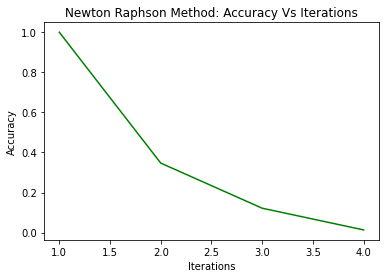

+-----------+--------------------+--------------------+-------------------------+
| Iteration |         x0         |         x1         |          f(x1)          |
+-----------+--------------------+--------------------+-------------------------+
|     1     |        0.0         |        1.0         |   -2.1779795225909053   |
|     2     |        1.0         | 0.6530794035261767 |   -0.46064212037687036  |
|     3     | 0.6530794035261767 | 0.5313433676065809 |   -0.04180273401019585  |
|     4     | 0.5313433676065809 | 0.5179099131356748 | -0.00046413358756547396 |
+-----------+--------------------+--------------------+-------------------------+


In [4]:
n_acc,NR_table = NewtonRaphson(f,f1,x0,e)
n_i = []
n_a = []
for i in n_acc:
    n_i.append(i[0])
    n_a.append(i[1])
plt.title("Newton Raphson Method: Accuracy Vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.plot(n_i,n_a,color = 'green')
plt.show()
print(NR_table)